# <center>Prediction of Agriculture Crop Production in India</center>

# Introduction 

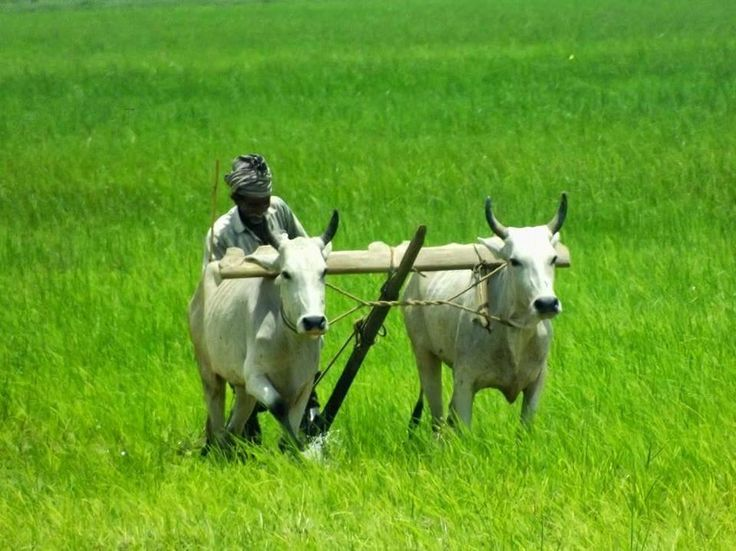

Agriculture is one of the main sources of income in India, where more than half of the population depends on agriculture for their livelihood. However, agriculture in India faces many challenges, such as climate change, water scarcity, pests, diseases, low productivity, market fluctuations, and socio-economic factors. These challenges have led to high rates of farmer suicide due to crop failure, debt, and distress. Therefore, there is an urgent need to improve the sustainability and profitability of agriculture in India by adopting smart and innovative solutions.

# Problem Statement

Agriculture is the backbone of the Indian economy. Due to global warming and climate change, traditional farming in the regular months has been distorted, and crops have been ruined. This is the most common phrase seen today. This not only causes economic losses but is also the main reason for farmer suicide. Now that agriculture needs support, the time has come for technology to take over. For a crop to grow, favorable soil conditions, ambient rainfall, and temperature are necessary. So we have formulated an analysis based on the prediction of a favorable crop based on temperature, current rainfall, and soil conditions.Agriculture is the backbone of the Indian economy. Due to global warming and climate change, traditional farming in the regular months has been distorted, and crops have been ruined. This is the most common phrase seen today. This not only causes economic losses but is also the main reason for farmer suicide. Now that agriculture needs support, the time has come for technology to take over. For a crop to grow, favorable soil conditions, ambient rainfall, and temperature are necessary. So we have formulated an analysis based on the prediction of a favorable crop based on temperature, current rainfall, and soil conditions.

# About Dataset

This Dataset Describes the Agricuture Crops Cultivation/Production in India.  

Source of the Data : https://data.gov.in/

# About Project

In this project, we will analyse the different agricultural crops produced in India from 2001 to 2014.

# Project Summary

This project analyses and explores the trends and patterns of agriculture production in India over a 14-year period. It will use data from government-licenced sources to compare the output and production of different crops across different states and regions. The project will also identify the factors that affect the productivity and profitability of agriculture in India, such as climate, irrigation, technology, policies, etc. The project will contribute to improving India's agricultural sector.

# Objectives of project

- To identify the factors that affect crop production in India.
- To help farmers make better decisions about crop selection and cultivation.
- To contribute to the food security of India.

# Import Libraries

In [1]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Meet and Greet data

Our first step is to create the get the csv and welcome it. Later we should dissect and perform descriptive analyis. Well that escalated quickly.

# Load the data using pandas read functions

In [2]:
#crops vise production yearly
crop=pd.read_csv("datafile.csv")

#state vise crop and cost of cultivation
crop_cult=pd.read_csv("datafile (1).csv")

#Crop and their production yearly
crop_prod=pd.read_csv("datafile (2).csv")

#crops and their variety
crop_var=pd.read_csv("datafile (3).csv")

#Agriculture production and frequency yearly
crop_agri=pd.read_csv("produce.csv")

This data represents the production index of various crops and agricultural products in India from 2004-05 to 2011-12.

The data provided includes information on the cost of cultivation, cost of production, and yield for various crops in different states of India.

The data presents crop production and area for different crops in multiple years. It covers a wide range of crops, including foodgrains, cereals, pulses, oilseeds, fibres, spices, fruits, and vegetables.

This Data presents crop, crop variety, recomended zones

This Data Presents the annual production of different crops from 1993 to 2014

# crop

In [3]:
print ("The shape of the  data is (row, column):"+ str(crop.shape))
print (crop.info())

The shape of the  data is (row, column):(13, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB
None


In [4]:
#Checking out the statistical parameters
crop.describe()

2004-05    2005-06     2006-07     2007-08     2008-09     2009-10  \
count     12.0   12.00000   12.000000   12.000000   12.000000   12.000000   
mean     100.0   99.75000  102.000000  104.750000  106.416667  114.916667   
std        0.0    6.64865   12.634728   10.963783   11.261022   15.900019   
min      100.0   86.00000   85.000000   87.000000   80.000000   81.000000   
25%      100.0   96.75000   96.250000   97.750000  101.250000  106.250000   
50%      100.0  100.00000  100.000000  102.000000  107.500000  115.500000   
75%      100.0  103.25000  104.750000  115.000000  113.000000  123.250000   
max      100.0  109.00000  134.000000  124.000000  124.000000  146.000000   

          2010-11     2011-12  
count   12.000000   12.000000  
mean   121.916667  120.750000  
std     11.405408   12.800036  
min     99.000000  102.000000  
25%    116.250000  109.500000  
50%    122.500000  120.500000  
75%    129.250000  130.750000  
max    138.000000  140.000000

<AxesSubplot:>

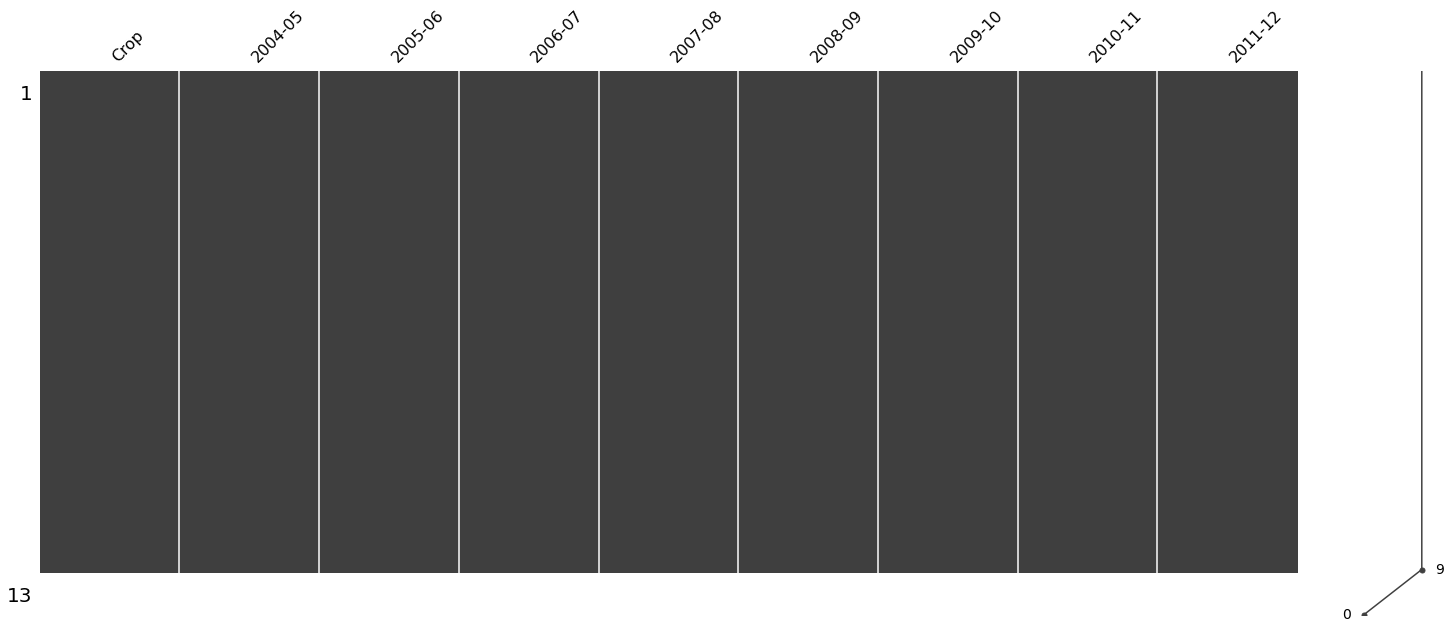

In [5]:
import missingno as msno 
msno.matrix(crop)

In [6]:
#count the number of missing values in the crop column.
crop.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [7]:
crop.dropna()

Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0                  Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1                 Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2        Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3                Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4           Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   
5                Fruits    100.0     99.0     99.0     98.0    102.0    104.0   
6                  Milk    100.0     97.0     98.0     98.0     98.0    112.0   
7   Eggs, Fish and Meat    100.0    102.0    101.0    100.0     99.0    116.0   
8              Oilseeds    100.0     86.0     85.0     97.0    104.0    103.0   
9            Sugarcane     100.0     96.0     91.0     87.0     80.0     81.0   
10               Fibers    100.0     92.0     91.0     96.0    109.0    107.0   
11      All Agriculture    100.0     99.0    101.0    104.0    106.0    115.0   

    2010-11  2011-12  
0     117.0    110.0  
1     120.0    108.0  
2     122.0    136.0  
3     137.0    129.0  
4     128.0    115.0  
5     114.0    119.0  
6     123.0    124.0  
7     133.0    137.0  
8      99.0    102.0  
9     109.0    107.0  
10    138.0    140.0  
11    123.0    122.0

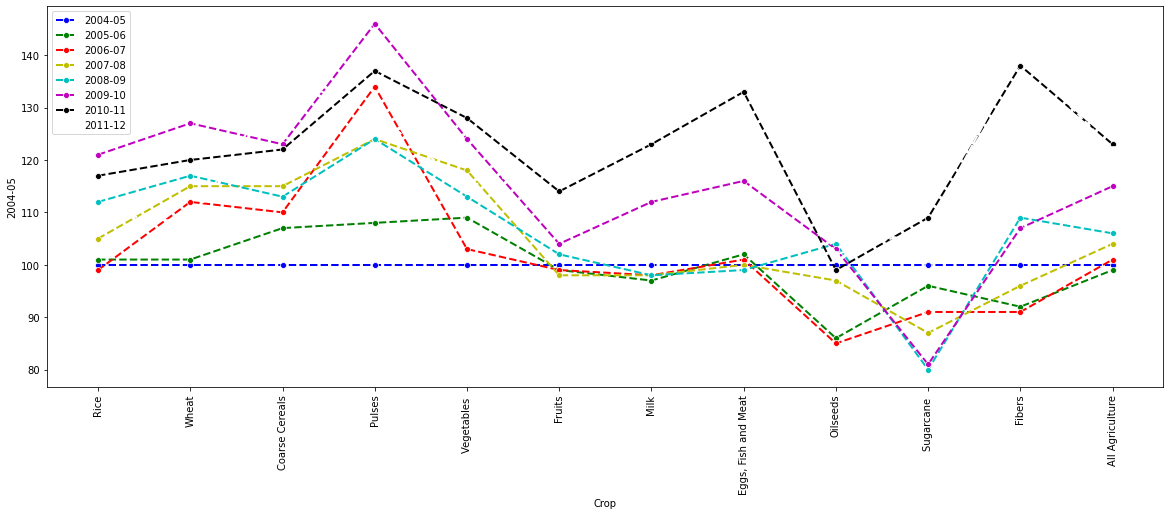

In [8]:
plt.figure(figsize=(20,7))
sns.lineplot(data=crop,x="Crop",y="2004-05",marker='o',linestyle='--', color='b', linewidth=2, label='2004-05')
sns.lineplot(data=crop,x="Crop",y="2005-06",marker='o',linestyle='--', color='g', linewidth=2, label='2005-06')
sns.lineplot(data=crop,x="Crop",y="2006-07",marker='o',linestyle='--', color='r', linewidth=2, label='2006-07')
sns.lineplot(data=crop,x="Crop",y="2007-08",marker='o',linestyle='--', color='y', linewidth=2,label='2007-08')
sns.lineplot(data=crop,x="Crop",y="2008-09",marker='o',linestyle='--', color='c', linewidth=2,label='2008-09')
sns.lineplot(data=crop,x="Crop",y="2009-10",marker='o',linestyle='--', color='m', linewidth=2,label='2009-10')
sns.lineplot(data=crop,x="Crop",y="2010-11",marker='o',linestyle='--', color='k', linewidth=2,label='2010-11')
sns.lineplot(data=crop,x="Crop",y="2011-12",marker='o',linestyle='--', color='w', linewidth=2,label='2011-12')
plt.xticks(rotation=90)
plt.show()

This graph represents crop vise yearly production.

# crop_cult

In [9]:
print ("The shape of the  data is (row, column):"+ str(crop_cult.shape))
print (crop_cult.info())

The shape of the  data is (row, column):(49, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB
None


In [10]:
#Checking out the statistical parameters
crop_cult.describe()

Cost of Cultivation (`/Hectare) A2+FL  \
count                              49.000000   
mean                            20363.537347   
std                             13561.435306   
min                              5483.540000   
25%                             12774.410000   
50%                             17022.000000   
75%                             24731.060000   
max                             66335.060000   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                           49.000000                          49.000000   
mean                         31364.666735                        1620.537755   
std                          20095.783569                        1104.990472   
min                           7868.640000                          85.790000   
25%                          19259.840000                         732.620000   
50%                          25909.050000                        1595.560000   
75%                          35423.480000                        2228.970000   
max                          91442.630000                        5777.480000   

       Yield (Quintal/ Hectare)   
count                  49.000000  
mean                   98.086735  
std                   245.293123  
min                     1.320000  
25%                     9.590000  
50%                    13.700000  
75%                    36.610000  
max                  1015.450000

In [11]:
#count the number of missing values.
crop_cult.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

# Checking for missing values

First lets check it visually

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

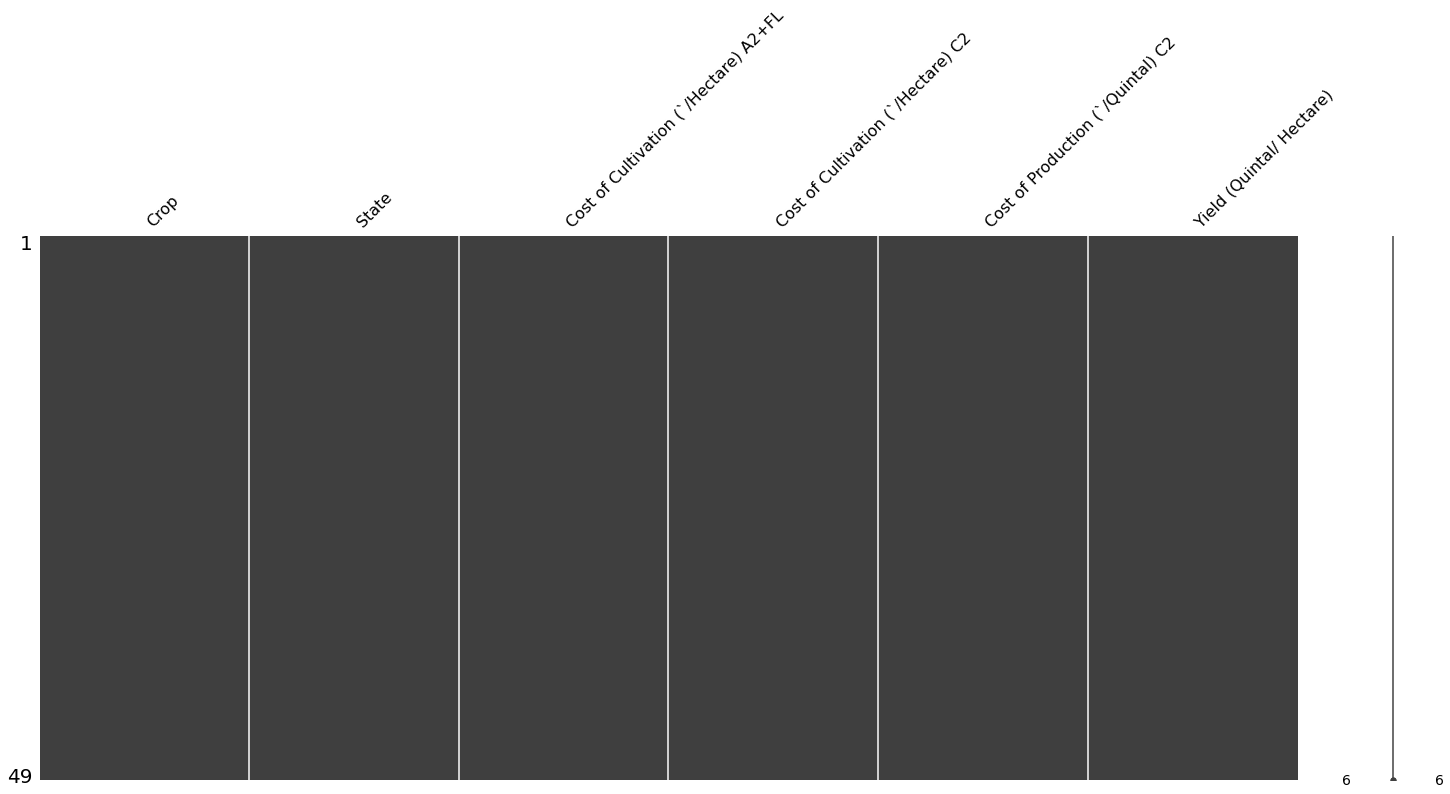

In [13]:
import missingno as msno 
msno.matrix(crop_cult)

Looks like we don't have any null values 

# Data Visualization

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


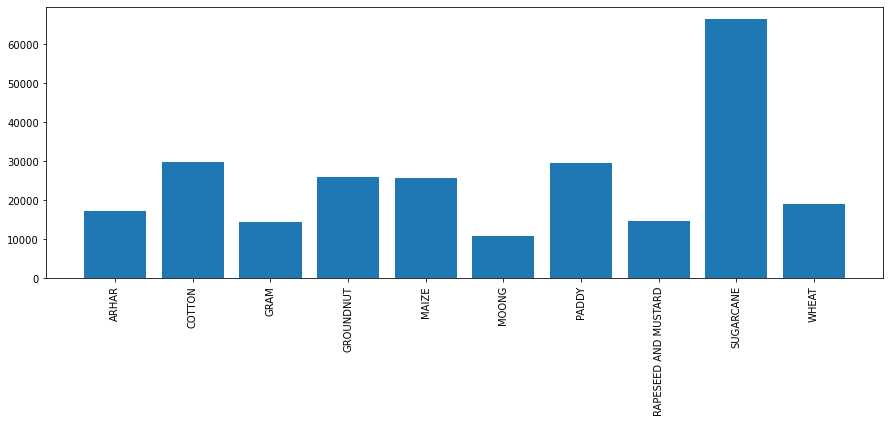

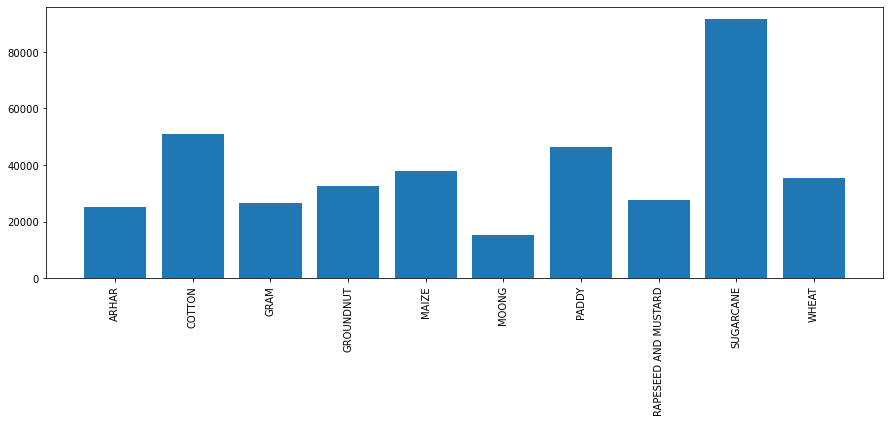

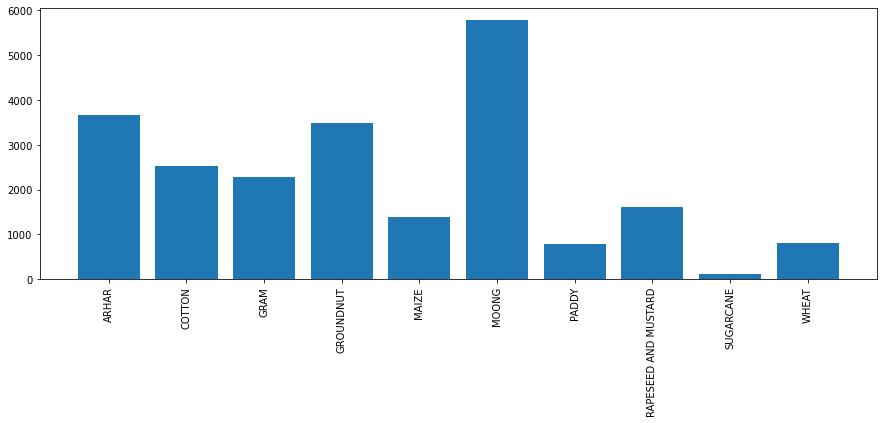

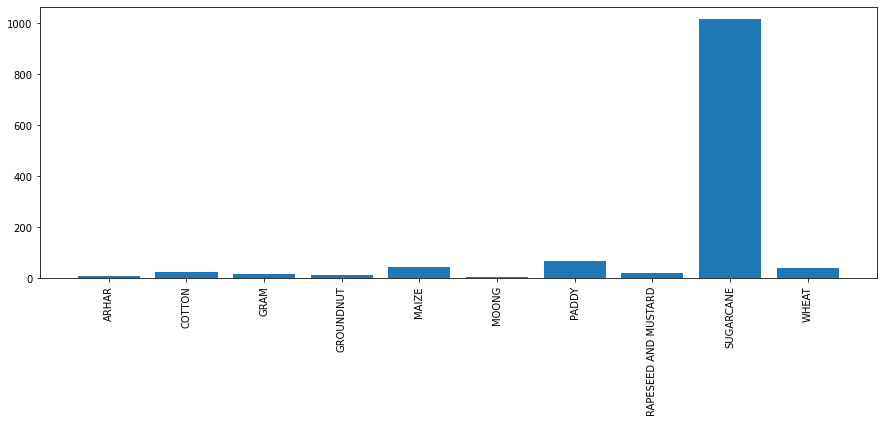

In [15]:
# crop VS Cost of Cultivation (`/Hectare) A2+FL
plt.figure(figsize=(15,5))
x=crop_cult["Cost of Cultivation (`/Hectare) A2+FL"]
y = crop_cult ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

# crop VS Cost of Cultivation (`/Hectare) C2
plt.figure(figsize=(15,5))
x=crop_cult["Cost of Cultivation (`/Hectare) C2"]
y = crop_cult ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

# crop VS Cost of Production (`/Quintal) C2
plt.figure(figsize=(15,5))
x=crop_cult["Cost of Production (`/Quintal) C2"]
y = crop_cult ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

# crop VS Yield (Quintal/ Hectare)
plt.figure(figsize=(15,5))
x=crop_cult["Yield (Quintal/ Hectare) "]
y = crop_cult ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

In There Above Graph 
- Sugarcane has highest Cost of Cultivation (`/Hectare) A2+FL
- Sugarcane has highest Cost of Cultivation (`/Hectare) C2
- Moong has highest Cost of Production (`/Quintal) C2
- Sugarcane has highest Yield (Quintal/ Hectare) 

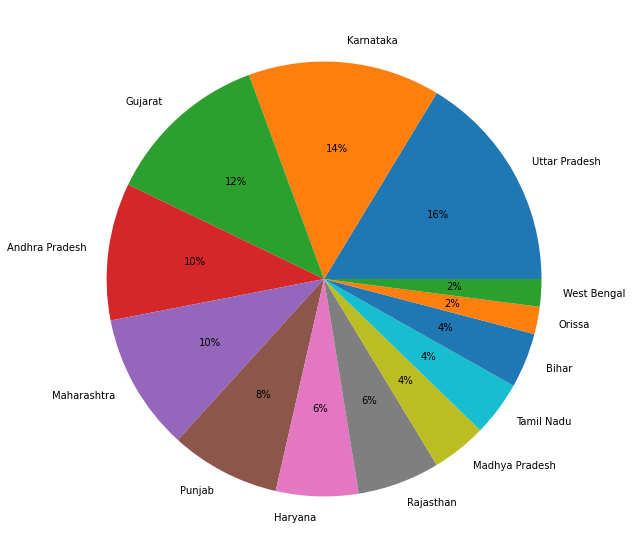

In [16]:
plt.figure(figsize=(20,10))
plt.pie(crop_cult["State"].value_counts(),autopct="%.f%%",labels=crop_cult["State"].unique())
plt.show()

- From the above diagram, we can conclude that Uttar Pradesh highest agricultural crop production.

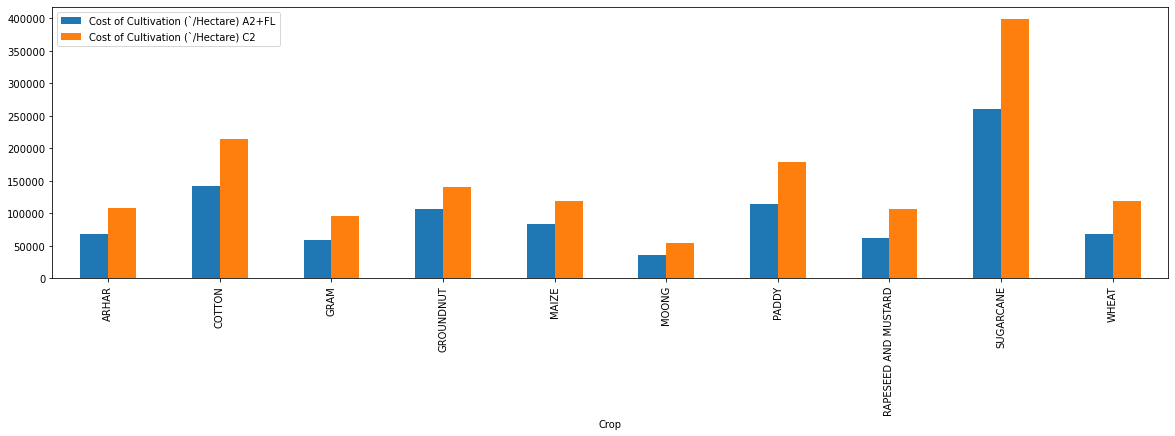

In [17]:
cols = crop_cult.columns
crop_cult.groupby('Crop')[cols[:-2]].sum().plot(kind='bar', figsize=(20,5));

- Above Graph is comparision between Cost of Cultivation (`/Hectare) A2+FL  and	Cost of Cultivation (`/Hectare) C2. Above Graph Represent that Sugarcane Has Highest Cost of Cultivation (`/Hectare) A2+FL  and	Cost of Cultivation (`/Hectare) C2.

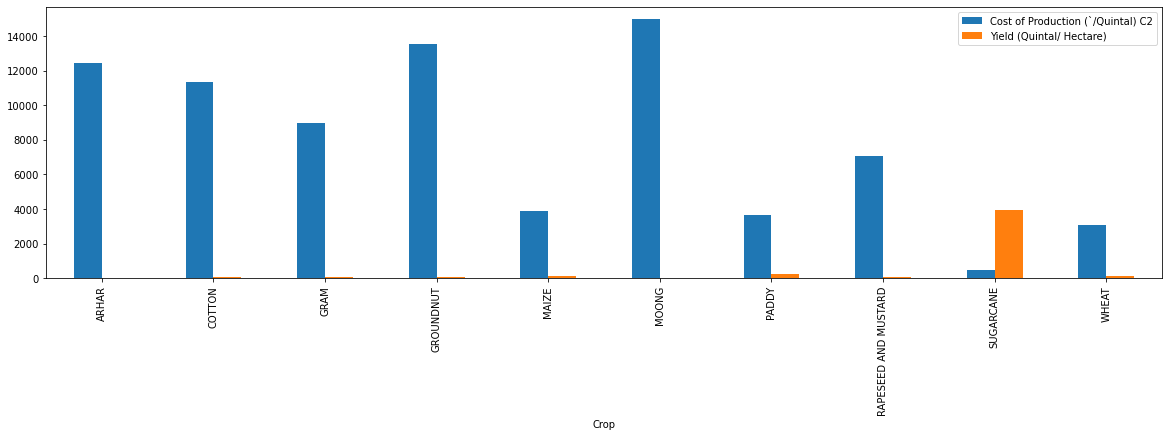

In [18]:
cols = crop_cult.columns
crop_cult.groupby('Crop')[cols[-2:]].sum().plot(kind='bar', figsize=(20,5));

- The above graph is a comparison between Cost of Production (`/Quintal) C2 and Yield (Quintal/Hectare). Above Graph Represents That Moong Has the Highest Cost of Production (`/Quintal) C2, but Yield (Quintal/Hectare) is Comparitively Low.

- Sugarcane has a low cost of production (/Quintal) C2 but the highest yield (/Quintal/Hectare).

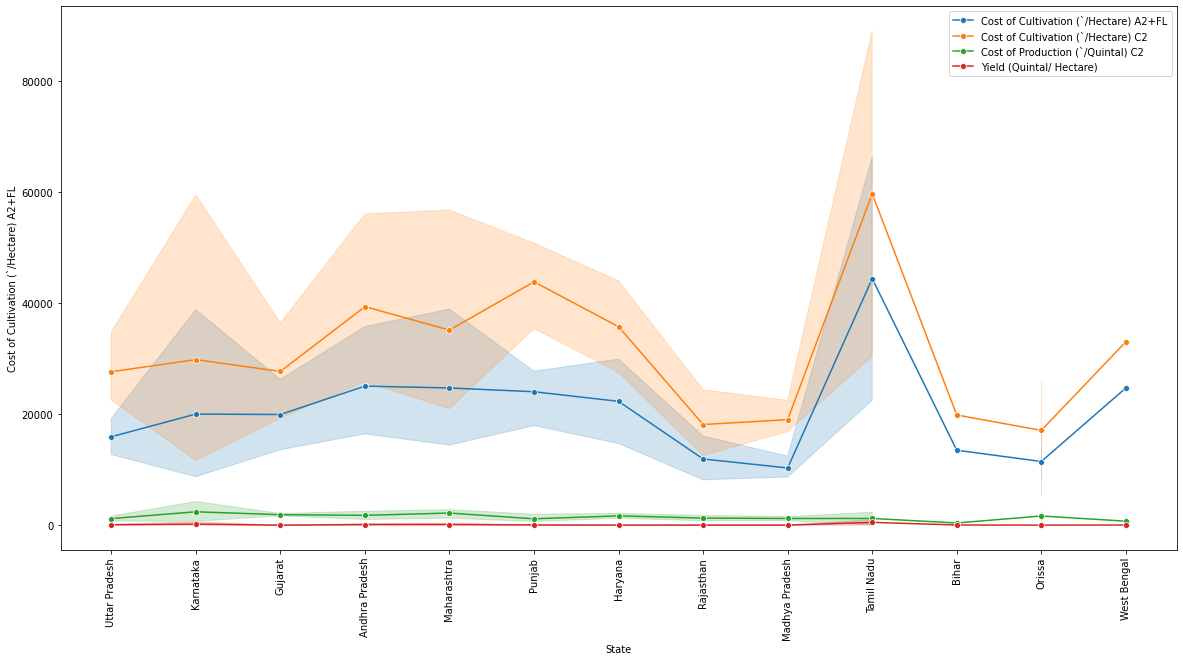

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(data=crop_cult,x="State",y="Cost of Cultivation (`/Hectare) A2+FL",marker='o',label='Cost of Cultivation (`/Hectare) A2+FL')
sns.lineplot(data=crop_cult,x="State",y="Cost of Cultivation (`/Hectare) C2",marker='o',label='Cost of Cultivation (`/Hectare) C2')
sns.lineplot(data=crop_cult,x="State",y="Cost of Production (`/Quintal) C2",marker='o',label='Cost of Production (`/Quintal) C2')
sns.lineplot(data=crop_cult,x="State",y="Yield (Quintal/ Hectare) ",marker='o',label='Yield (Quintal/ Hectare) ')
plt.xticks(rotation=90)
plt.show()

Above line graph represents State vise Cost of cultivation, cost of production and yield

# Correlation plot of attributes

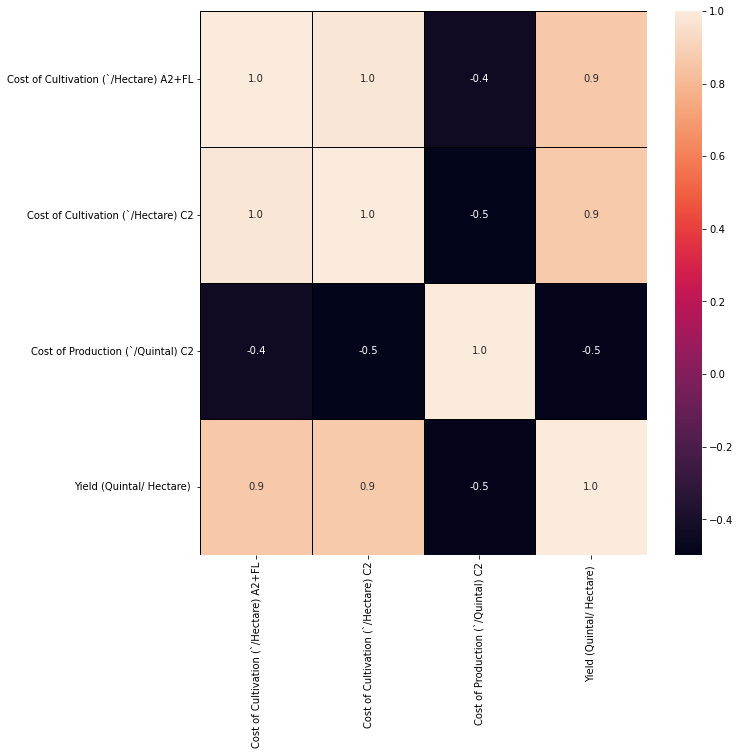

In [20]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(crop_cult.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

# crop_prod

In [21]:
print ("The shape of the  data is (row, column):"+ str(crop_prod.shape))
print (crop_prod.info())

The shape of the  data is (row, column):(55, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                55 non-null     object 
 1   Production 2006-07  55 non-null     float64
 2   Production 2007-08  55 non-null     float64
 3   Production 2008-09  55 non-null     float64
 4   Production 2009-10  55 non-null     float64
 5   Production 2010-11  55 non-null     float64
 6   Area 2006-07        55 non-null     float64
 7   Area 2007-08        55 non-null     float64
 8   Area 2008-09        55 non-null     float64
 9   Area 2009-10        55 non-null     float64
 10  Area 2010-11        55 non-null     float64
 11  Yield 2006-07       55 non-null     float64
 12  Yield 2007-08       55 non-null     float64
 13  Yield 2008-09       55 non-null     float64
 14  Yield 2009-10       55 non-null     float64
 15  Yield 2010

In [22]:
#Checking out the statistical parameters
crop_prod.describe()

Production 2006-07  Production 2007-08  Production 2008-09  \
count           55.000000           55.000000           55.000000   
mean           168.698182          182.629091          179.952727   
std            179.503163          199.671545          187.409253   
min             53.900000           54.400000           50.000000   
25%            124.500000          122.200000          116.050000   
50%            142.700000          160.100000          156.500000   
75%            184.300000          200.100000          188.550000   
max           1427.700000         1571.500000         1463.000000   

       Production 2009-10  Production 2010-11  Area 2006-07  Area 2007-08  \
count           55.000000           55.000000     55.000000     55.000000   
mean           173.749091          210.181818    116.025455    118.403636   
std            184.231322          232.535985     37.990960     41.287797   
min             42.900000           42.100000     47.900000     47.400000   
25%            105.350000          126.900000     92.550000     93.300000   
50%            140.300000          169.000000    120.700000    121.700000   
75%            197.050000          217.350000    131.050000    135.800000   
max           1430.300000         1790.600000    222.700000    241.600000   

       Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  Yield 2007-08  \
count     55.000000     55.000000     55.000000      55.000000      55.000000   
mean     120.530909    118.203636    127.216364     146.829091     153.774545   
std       44.460177     44.976615     54.842653     144.836331     153.243102   
min       43.600000     37.500000     36.100000      86.000000      75.300000   
25%       93.200000     88.650000     90.650000     106.800000     116.800000   
50%      121.900000    120.900000    129.400000     118.700000     124.500000   
75%      136.250000    134.800000    147.950000     137.600000     154.400000   
max      254.500000    260.300000    314.700000    1176.600000    1247.700000   

       Yield 2008-09  Yield 2009-10  Yield 2010-11  
count      55.000000      55.000000      55.000000  
mean      149.476364     147.427273     164.570909  
std       141.412539     143.963743     160.925948  
min        72.700000      80.700000      80.800000  
25%       110.950000     108.300000     121.050000  
50%       123.600000     122.100000     138.900000  
75%       148.500000     142.800000     168.850000  
max      1156.800000    1172.100000    1310.800000

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

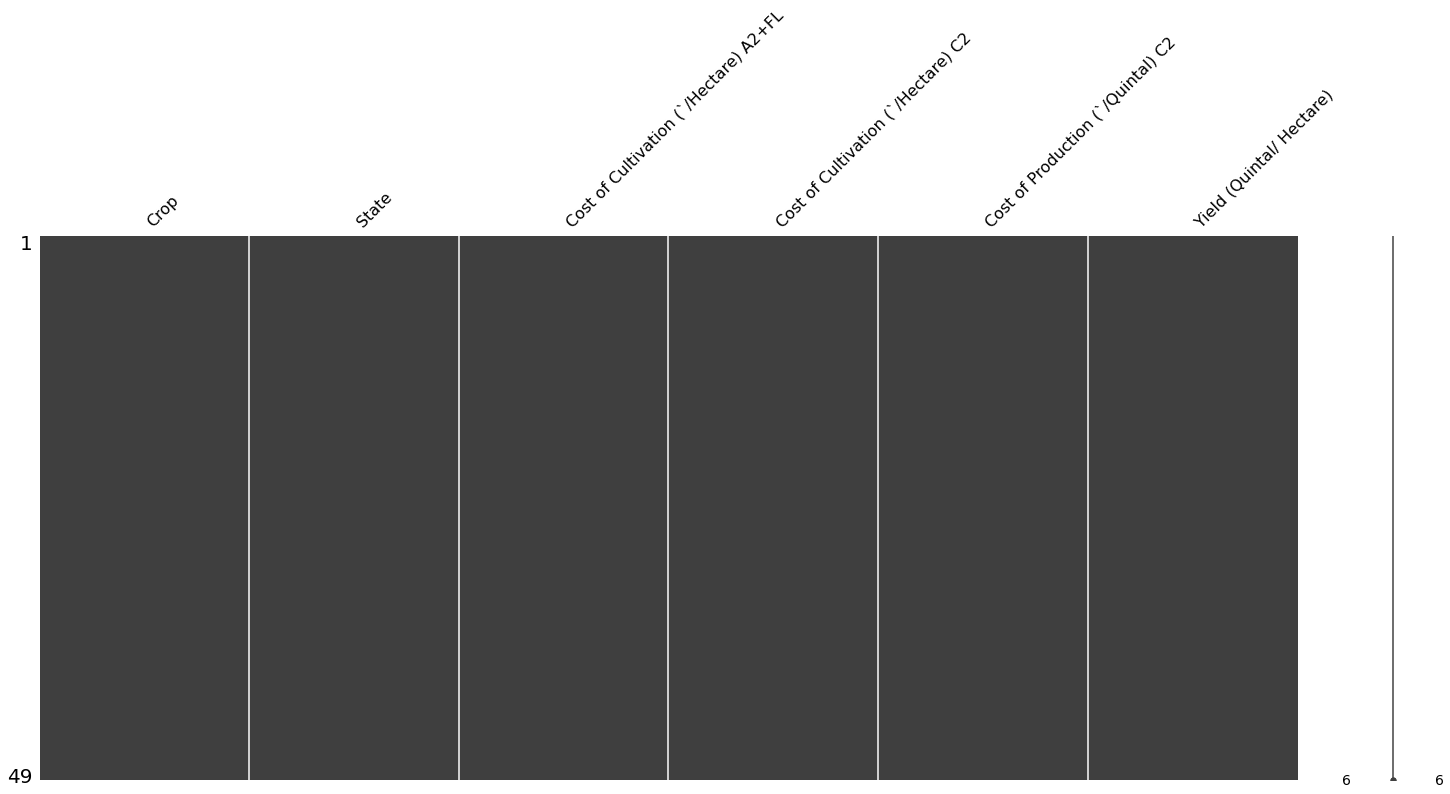

In [23]:
import missingno as msno 
msno.matrix(crop_cult)
#count the number of missing values.
crop_cult.isnull().sum()

Looks like we don't have any null values

# Production

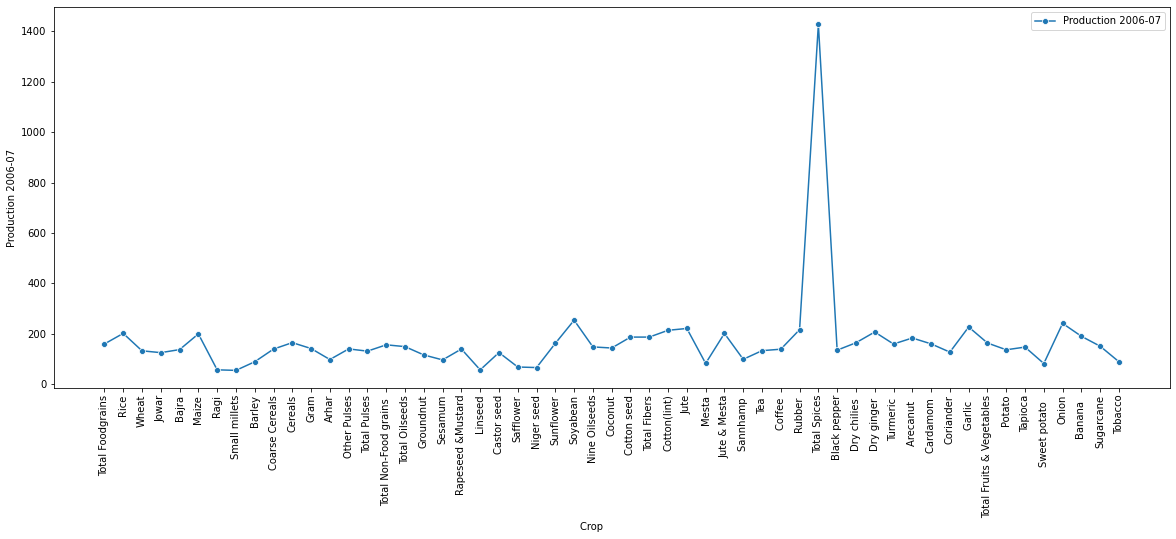

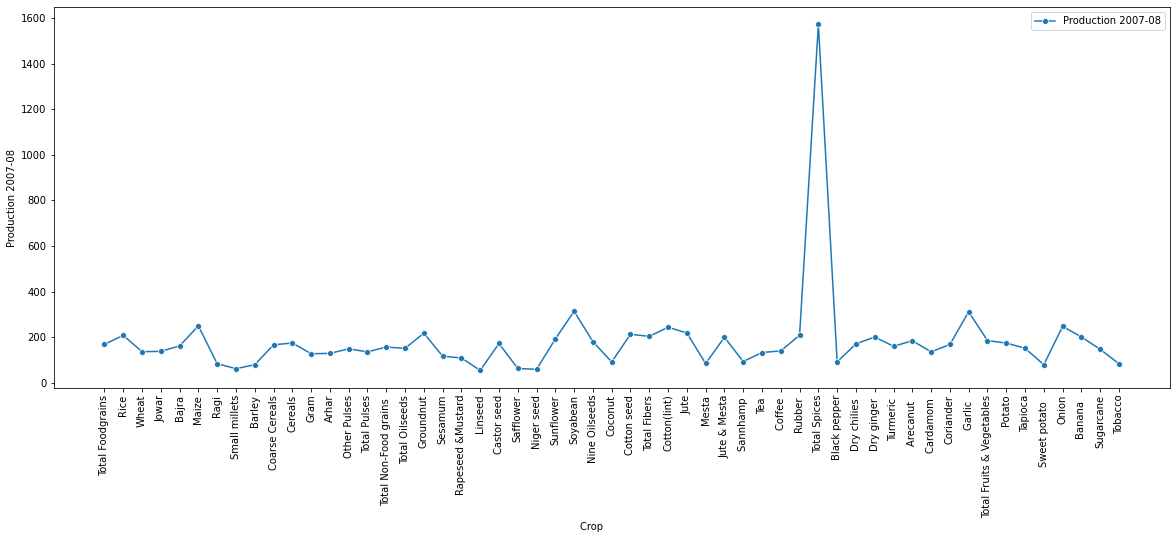

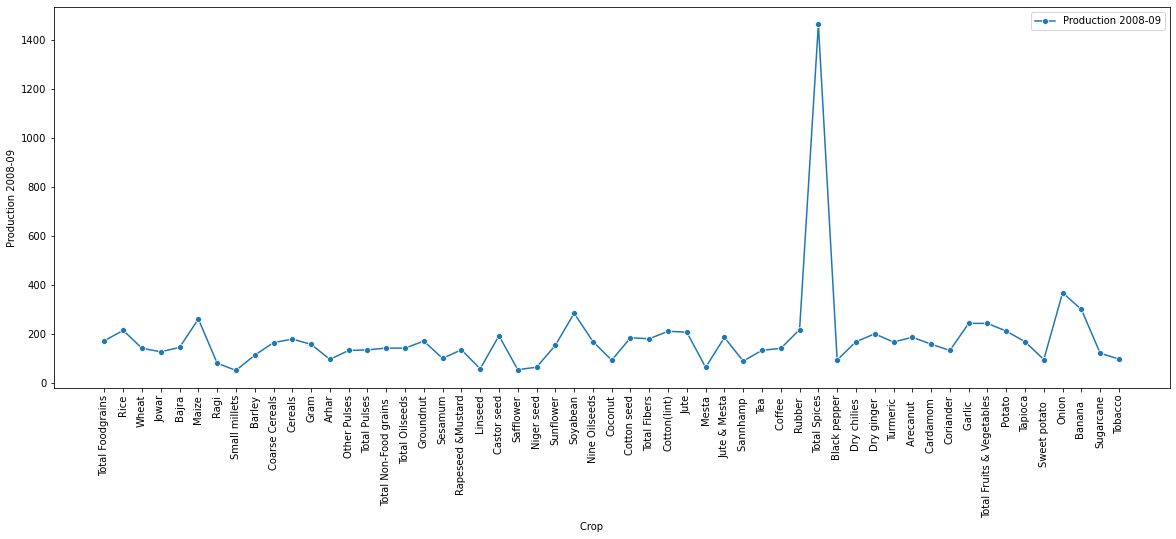

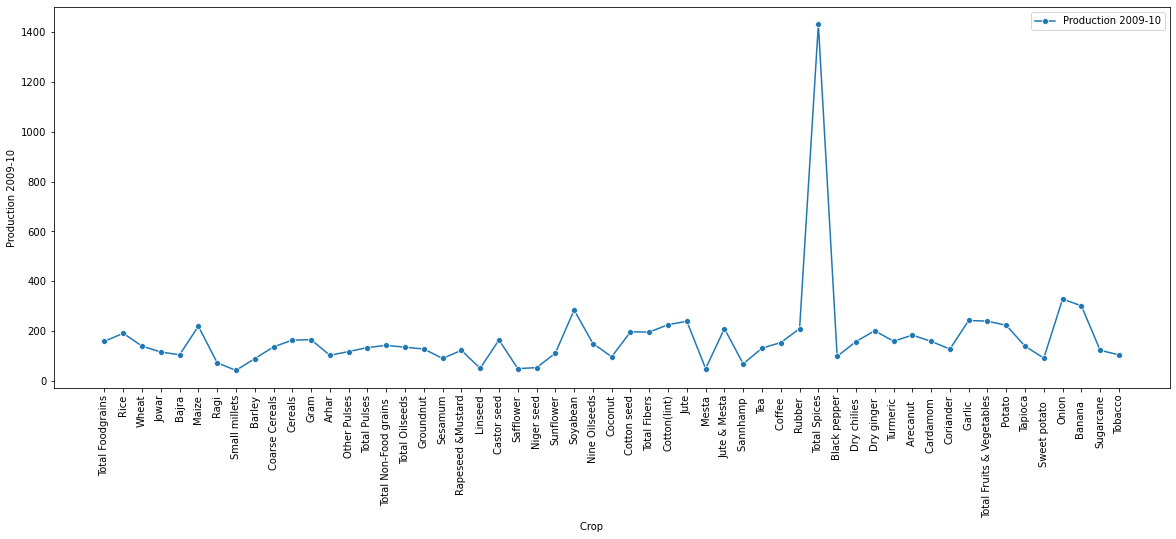

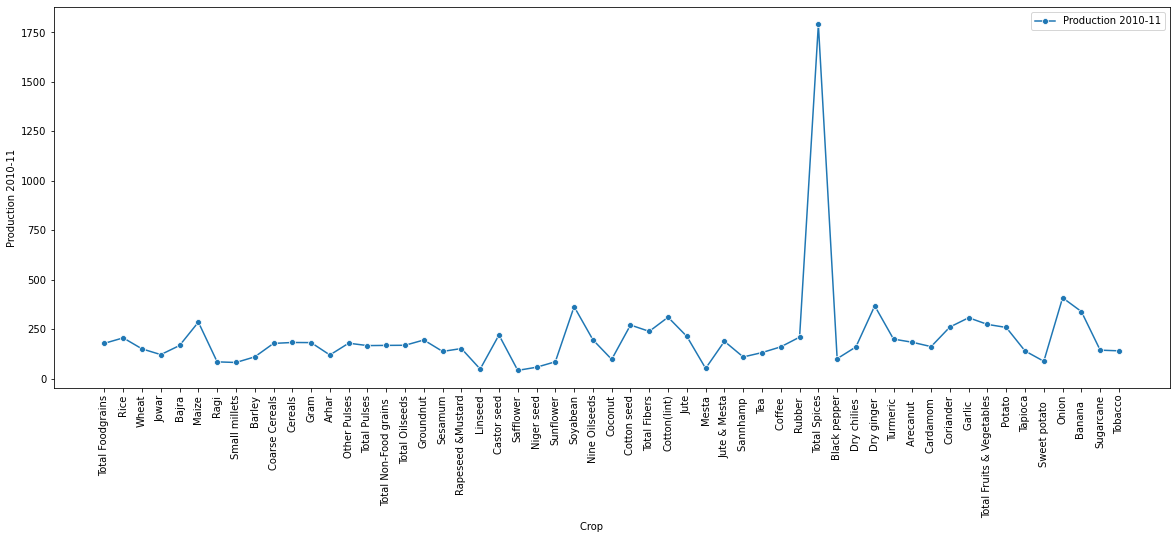

In [24]:
# Production 2006-07
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Production 2006-07",marker='o',label='Production 2006-07')
plt.xticks(rotation=90)
plt.show()

#Production 2007-08
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Production 2007-08",marker='o',label='Production 2007-08')
plt.xticks(rotation=90)
plt.show()

#Production 2008-09
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Production 2008-09",marker='o',label='Production 2008-09')
plt.xticks(rotation=90)
plt.show()

#Production 2009-10
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Production 2009-10",marker='o',label='Production 2009-10')
plt.xticks(rotation=90)
plt.show()

#Production 2010-11
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Production 2010-11",marker='o',label='Production 2010-11')
plt.xticks(rotation=90)
plt.show()

Above Graphs Represents The Crop Production Yearly.

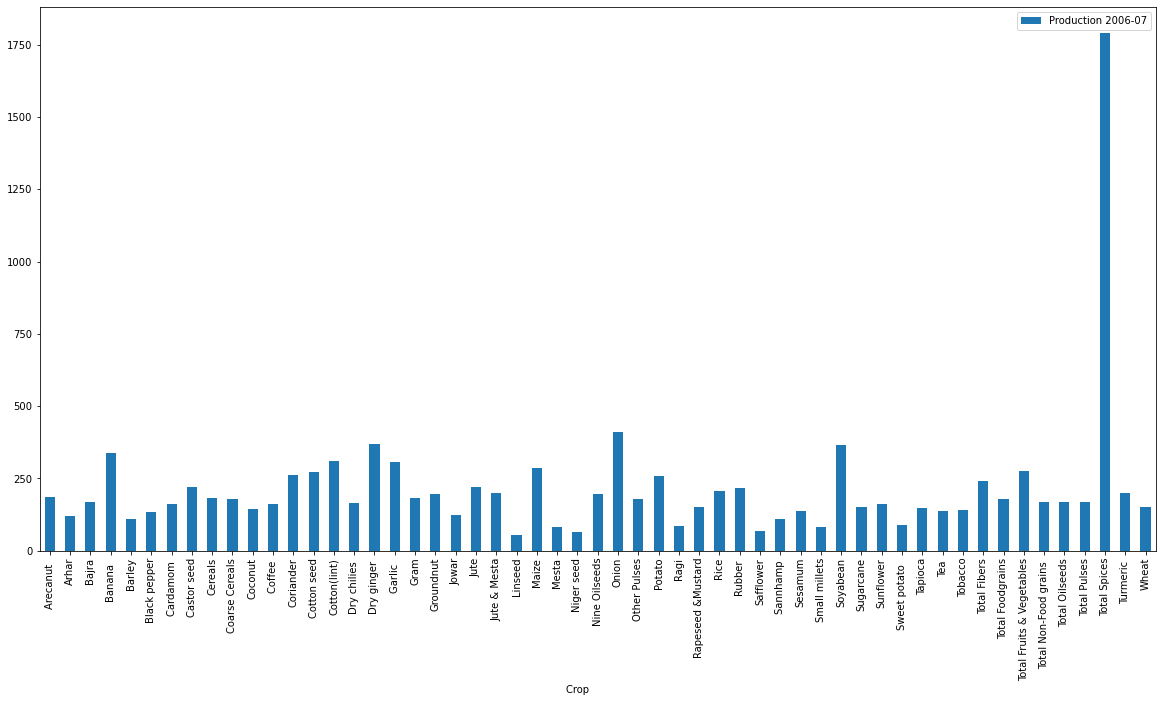

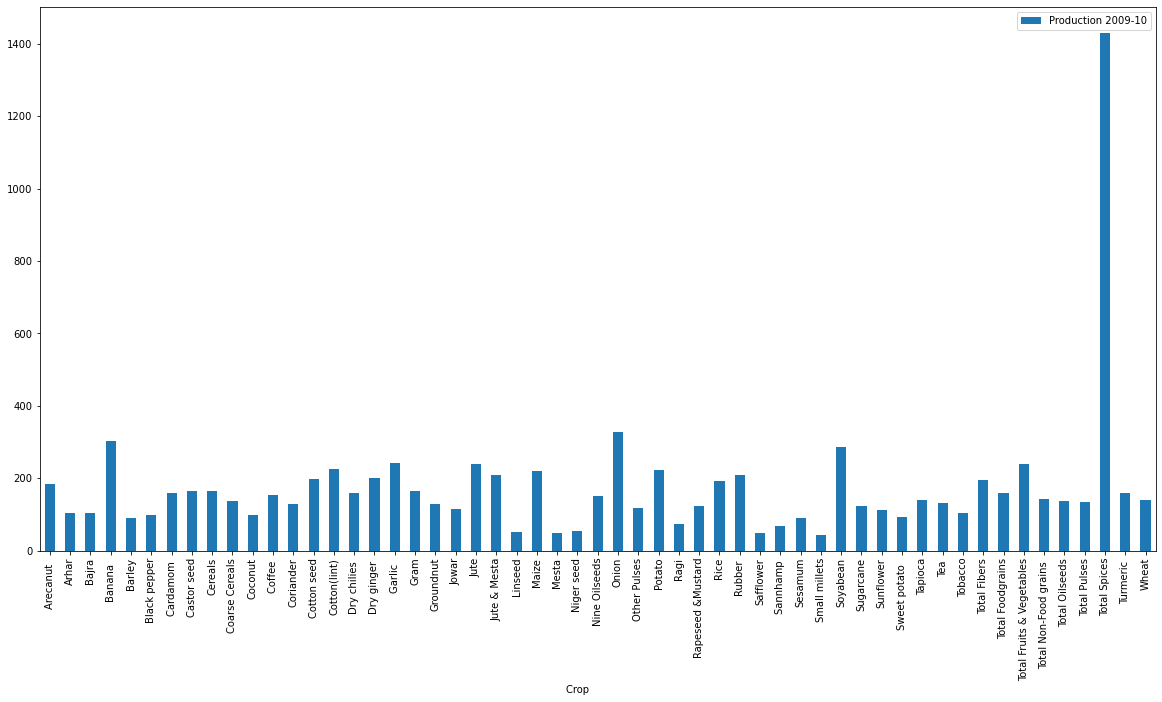

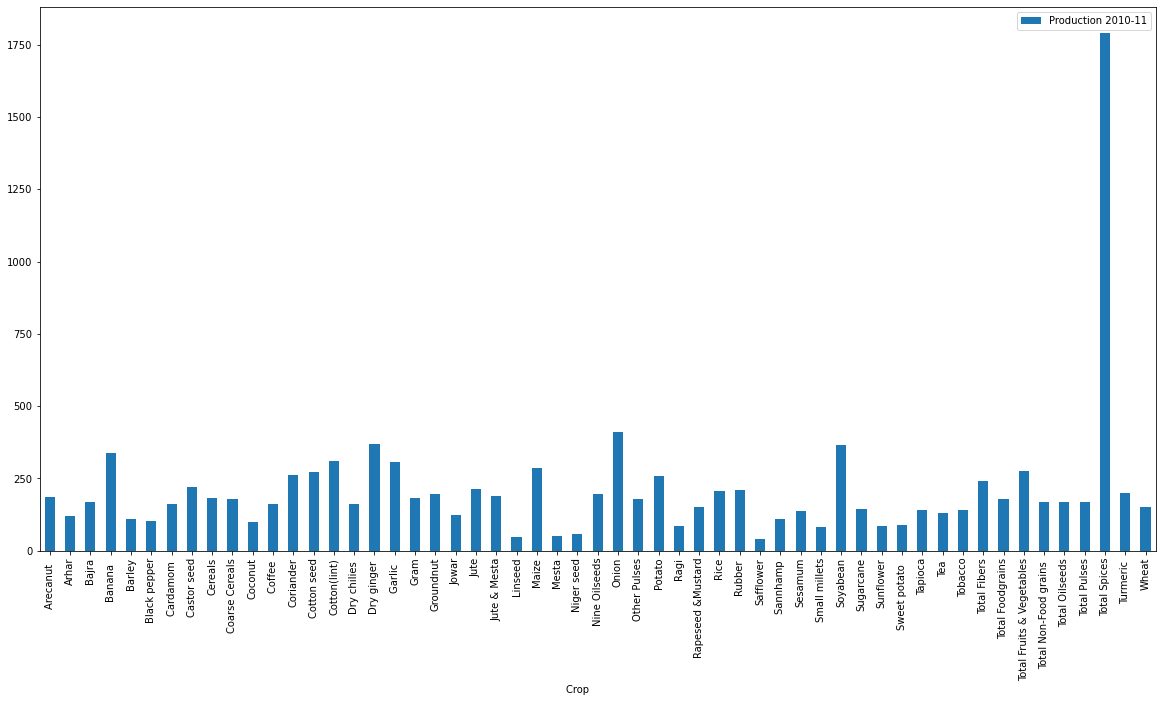

In [25]:
#2006-07
cols = crop_prod.columns
crop_prod.groupby('Crop             ')[cols[1:-14]].sum().plot(kind='bar', figsize=(20,10));

#2007-08
cols = crop_prod.columns
crop_prod.groupby('Crop             ')[cols[2-13]].sum().plot(kind='bar', figsize=(20,10));

#2008-09
cols = crop_prod.columns
crop_prod.groupby('Crop             ')[cols[3-12]].sum().plot(kind='bar', figsize=(20,10));

#2009-10
cols = crop_prod.columns
crop_prod.groupby('Crop             ')[cols[4:-11]].sum().plot(kind='bar', figsize=(20,10));

#2010-11
cols = crop_prod.columns
crop_prod.groupby('Crop             ')[cols[5:-10]].sum().plot(kind='bar', figsize=(20,10));

Above Graphs Reprsent yearly comparision of production Maximum Crop produced during 2010-11

# Area

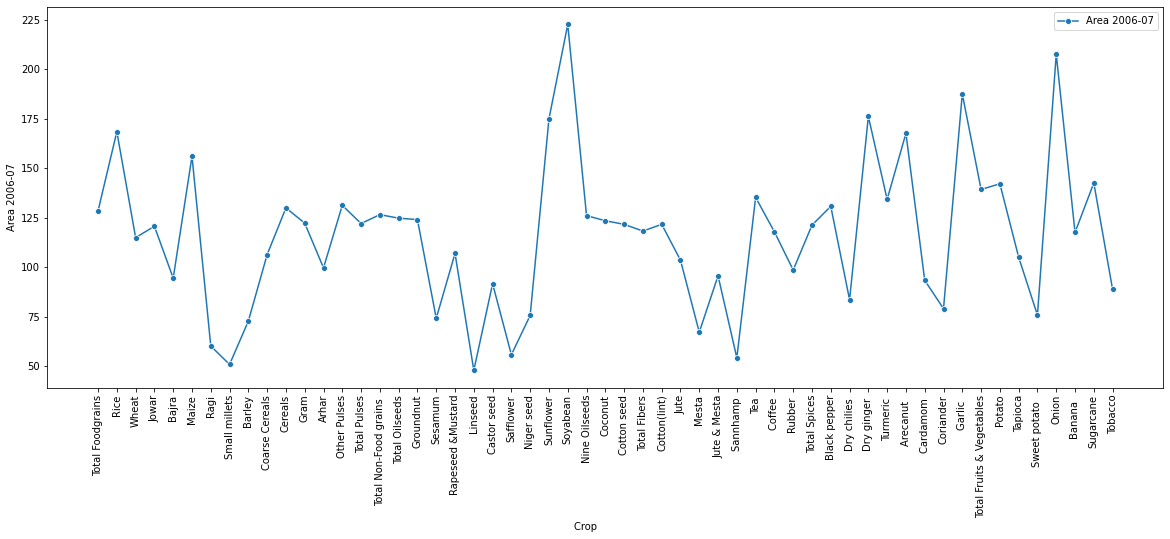

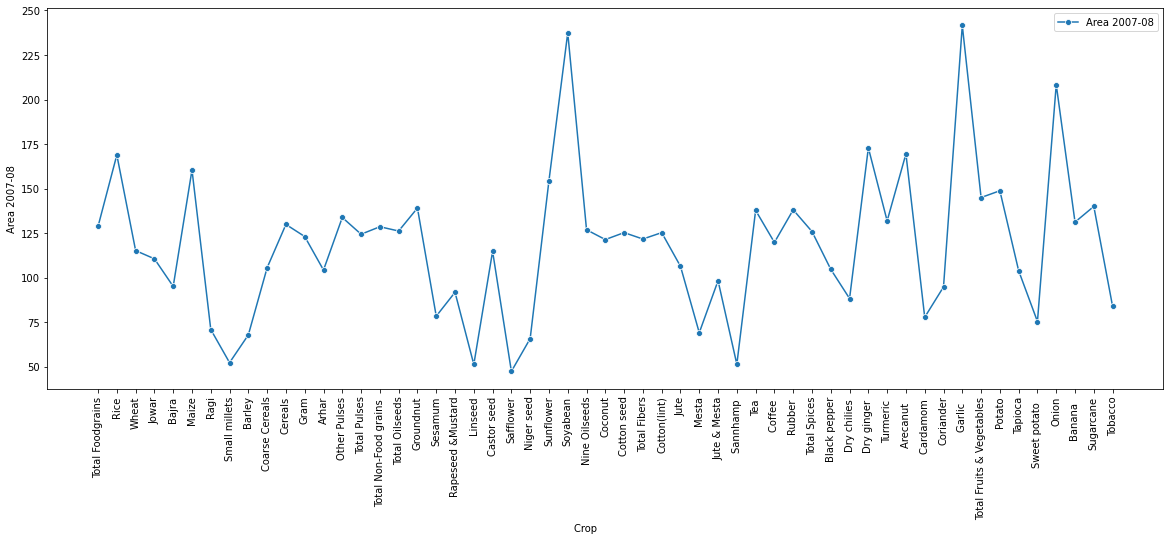

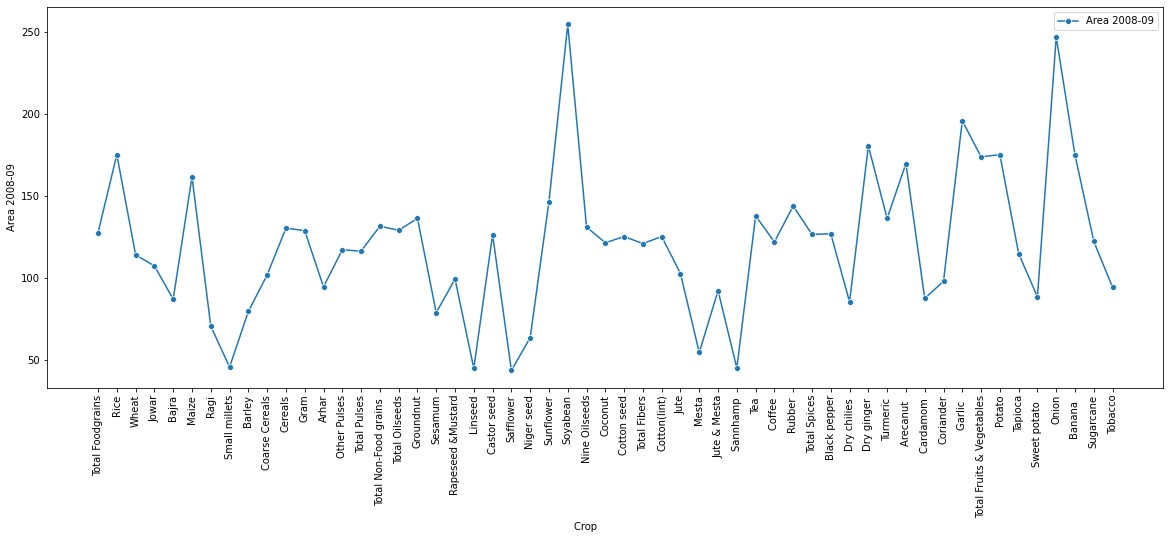

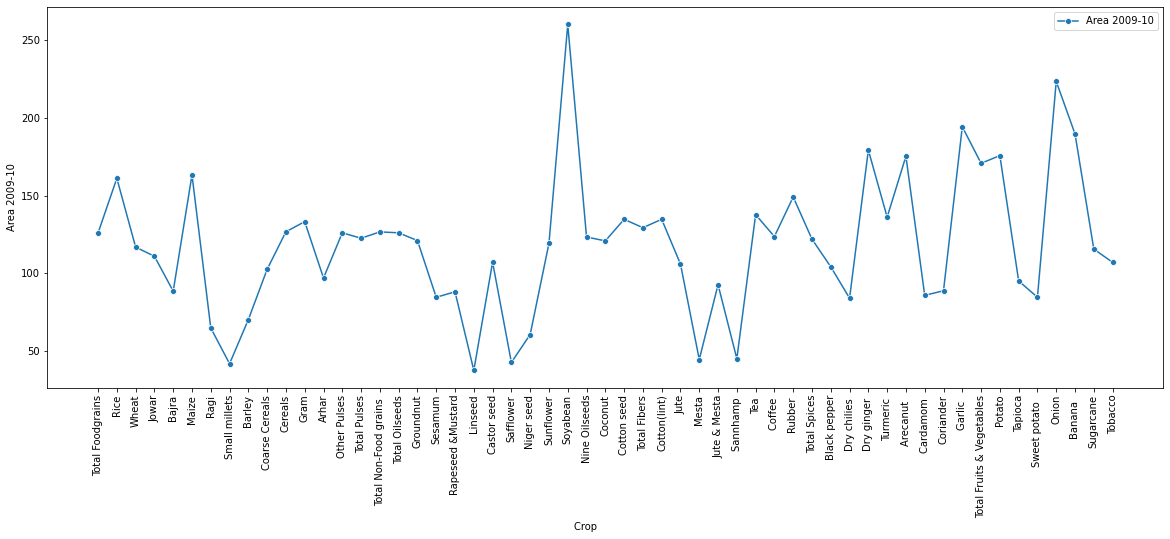

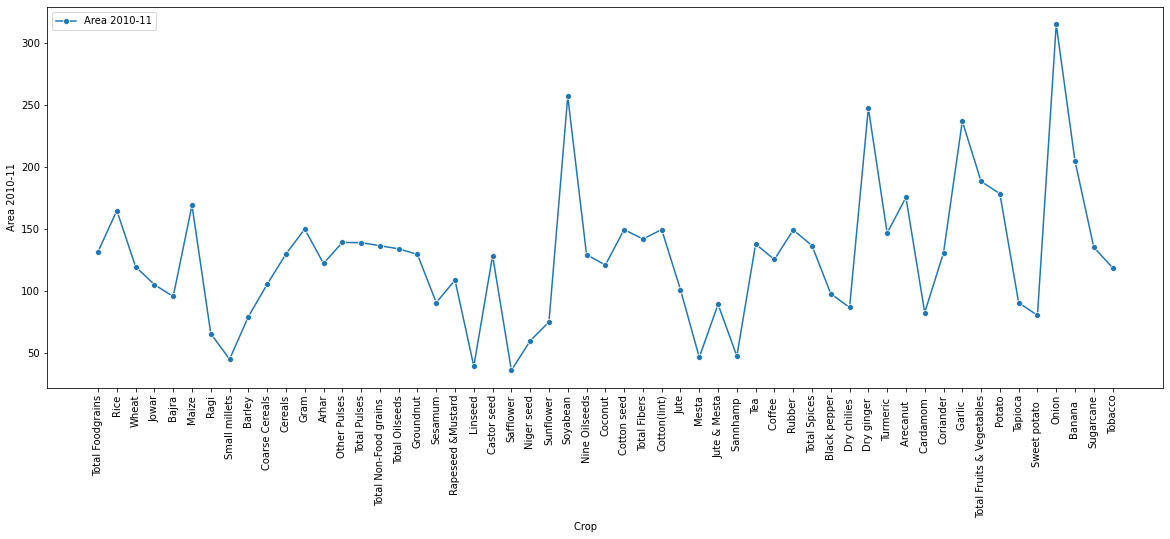

In [26]:
# Area 2006-07
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Area 2006-07",marker='o',label='Area 2006-07')
plt.xticks(rotation=90)
plt.show()

#Area 2007-08
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Area 2007-08",marker='o',label='Area 2007-08')
plt.xticks(rotation=90)
plt.show()

#Area 2008-09
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Area 2008-09",marker='o',label='Area 2008-09')
plt.xticks(rotation=90)
plt.show()

#Area 2009-10
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Area 2009-10",marker='o',label='Area 2009-10')
plt.xticks(rotation=90)
plt.show()

#Area 2010-11
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Area 2010-11",marker='o',label='Area 2010-11')
plt.xticks(rotation=90)
plt.show()

Above Graphs Represents Soybean grows on more Area

# Yield

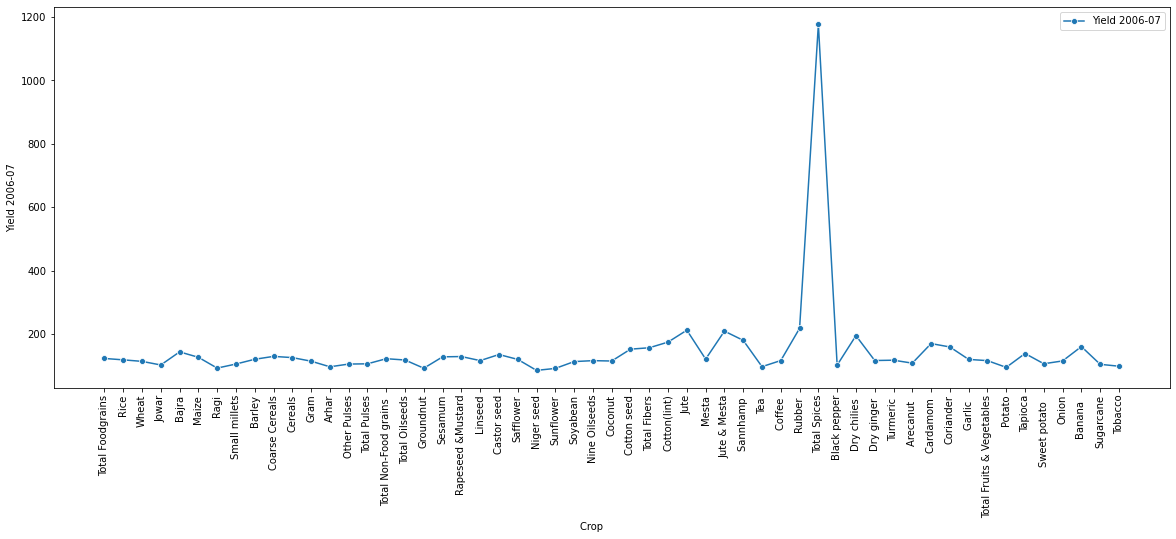

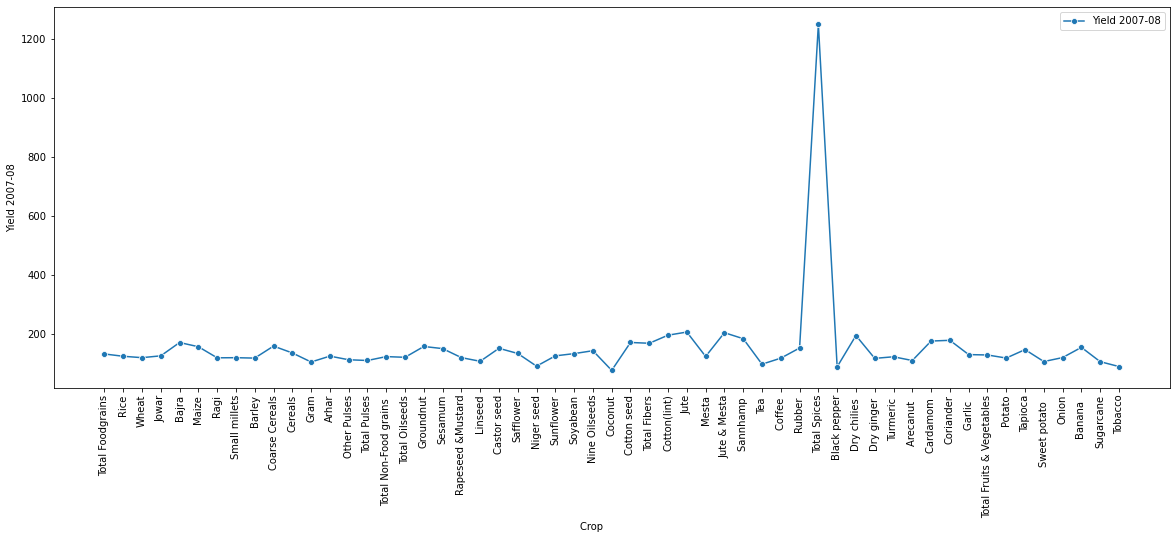

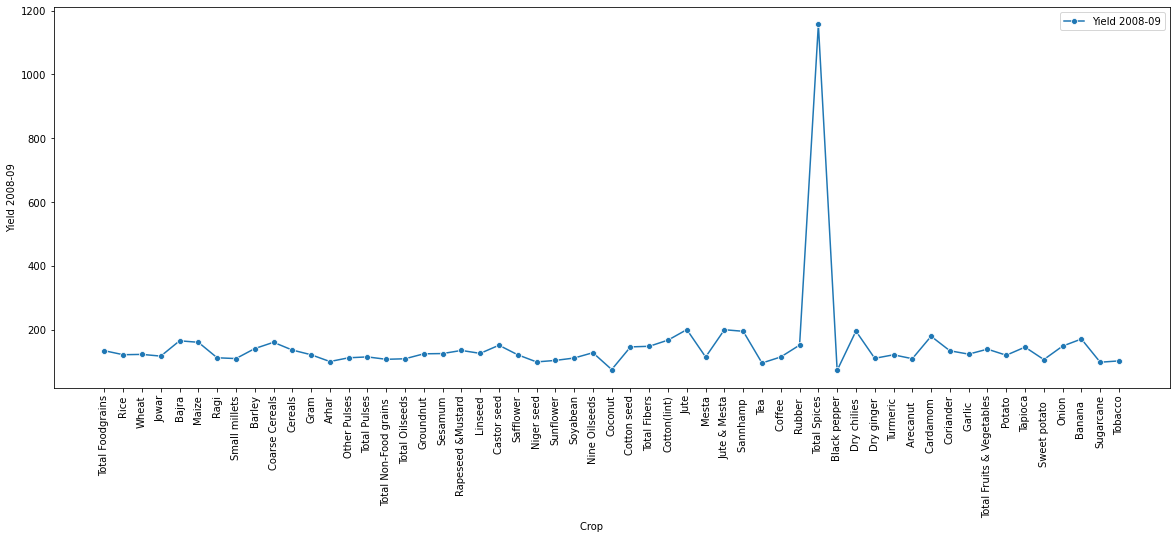

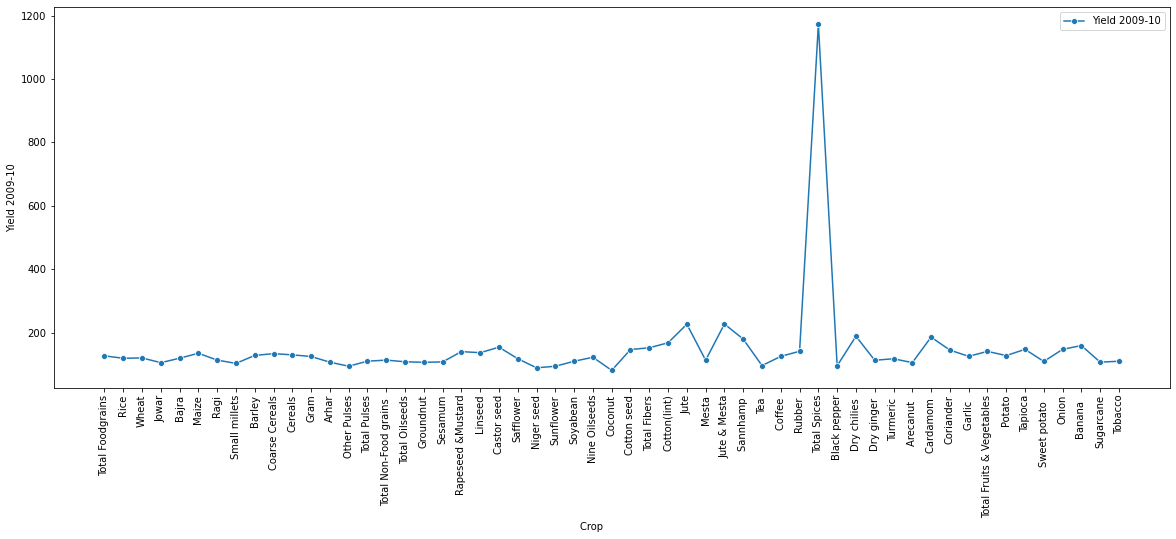

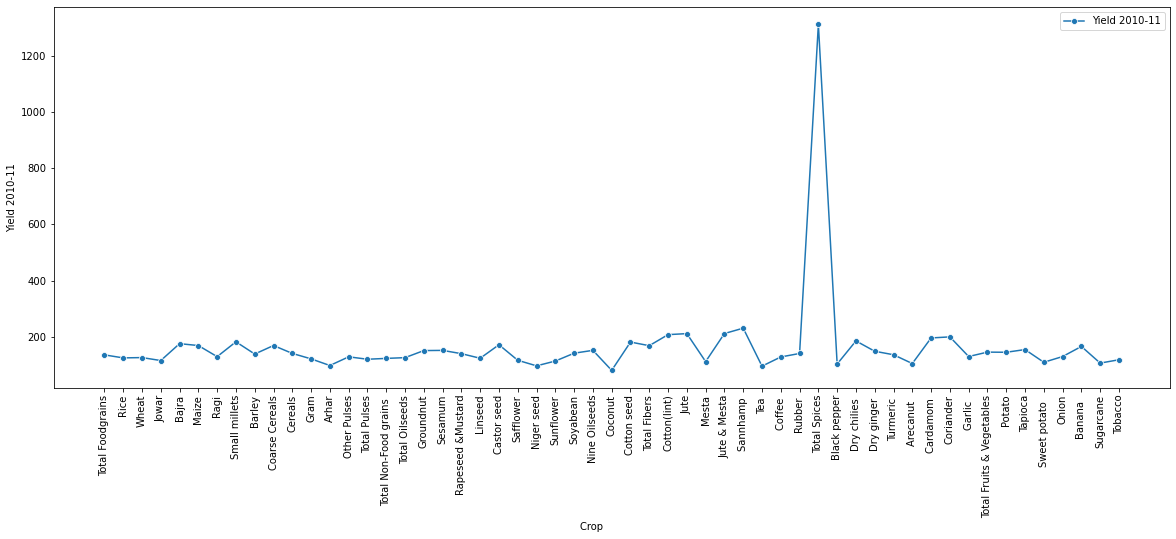

In [27]:
# Yield 2006-07
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Yield 2006-07",marker='o',label='Yield 2006-07')
plt.xticks(rotation=90)
plt.show()

#Yield 2007-08
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Yield 2007-08",marker='o',label='Yield 2007-08')
plt.xticks(rotation=90)
plt.show()

#Yield 2008-09
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Yield 2008-09",marker='o',label='Yield 2008-09')
plt.xticks(rotation=90)
plt.show()

#Yield 2009-10
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Yield 2009-10",marker='o',label='Yield 2009-10')
plt.xticks(rotation=90)
plt.show()

#Yield 2010-11
plt.figure(figsize=(20,7))
sns.lineplot(data=crop_prod,x="Crop             ",y="Yield 2010-11",marker='o',label='Yield 2010-11')
plt.xticks(rotation=90)
plt.show()

# crop_var

In [28]:
print ("The shape of the  data is (row, column):"+ str(crop_var.shape))
print (crop_var.info())

The shape of the  data is (row, column):(78, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Crop                      78 non-null     object 
 1   Variety                   78 non-null     object 
 2   Season/ duration in days  50 non-null     object 
 3   Recommended Zone          77 non-null     object 
 4   Unnamed: 4                0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 3.2+ KB
None


In [29]:
#Checking out the statistical parameters
crop_var.describe()

Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

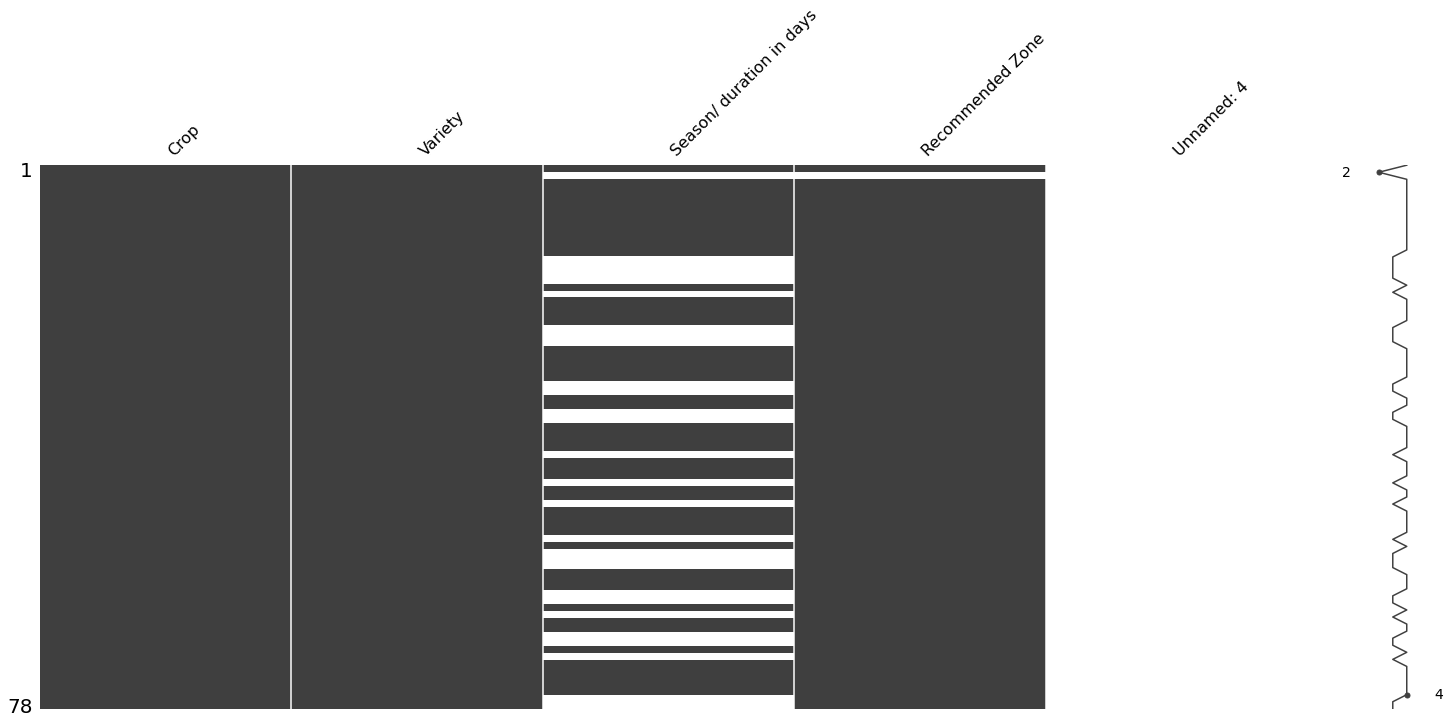

In [30]:
import missingno as msno 
msno.matrix(crop_var)
#count the number of missing values.
crop_var.isnull().sum()

Above Data shows 28 null values in Season/ duration in days and 1  in Recommended Zone

In [31]:
print("Crop",crop_var.Crop.value_counts(),sep = '\n')
print("-"*40)
print("Variety",crop_var.Variety.value_counts(),sep = '\n')
print("-"*40)

Crop
Wheat                  9
Paddy                  8
Pearl Millet           7
Maize                  6
Indian Mustard         4
Groundnut              3
Cotton                 3
Oat                    3
Sugarcane              3
Fieldpea               3
Linseed                3
Barley                 3
Bengal Gram            2
Lentil                 2
Mesta                  2
Urdbean                2
Cluster Bean           2
Jute                   2
Sesame                 1
Finger Millet          1
Cowpea (Fodder)        1
Tall Fescue Grass      1
Horse Gram             1
Napier Bajra Hybrid    1
Yellow Sarson          1
Chickpea               1
Mungbean               1
French Bean            1
Desi Cotton            1
Name: Crop, dtype: int64
----------------------------------------
Variety
Chinsurah Rice (IET 19140)        1
Pant Lentil-8(Pant L-063)         1
Mash 479 (KUG 479)                1
PKV AKM-4 (AKM-9904)              1
Gujarat Rajmash-1 (DPR 88-1-2)    1
                

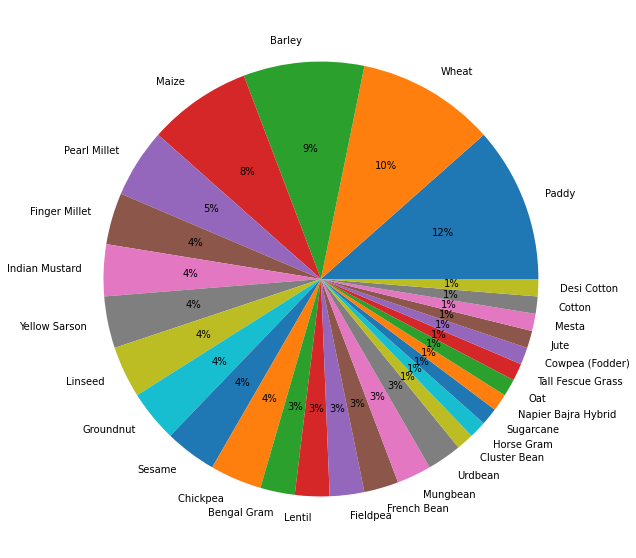

In [32]:
plt.figure(figsize=(20,10))
plt.pie(crop_var["Crop"].value_counts(),autopct="%.f%%",labels=crop_var["Crop"].unique())
plt.show()

# crop_agri

In [33]:
print ("The shape of the  data is (row, column):"+ str(crop_agri.shape))
print (crop_agri.info())

The shape of the  data is (row, column):(429, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  429 non-null    object 
 1   Frequency    429 non-null    object 
 2   Unit         429 non-null    object 
 3    3-1993      3 non-null      float64
 4    3-1994      4 non-null      float64
 5    3-1995      4 non-null      float64
 6    3-1996      6 non-null      float64
 7    3-1997      10 non-null     float64
 8    3-1998      10 non-null     float64
 9    3-1999      11 non-null     float64
 10   3-2000      20 non-null     float64
 11   3-2001      22 non-null     float64
 12   3-2002      36 non-null     float64
 13   3-2003      128 non-null    float64
 14   3-2004      361 non-null    float64
 15   3-2005      425 non-null    float64
 16   3-2006      423 non-null    float64
 17   3-2007      418 non-null    float64
 18  

In [34]:
#Checking out the statistical parameters
crop_agri.describe()

3-1993   3-1994   3-1995     3-1996        3-1997        3-1998  \
count      3.0      4.0      4.0   6.000000     10.000000     10.000000   
mean       0.0      0.0      0.0   6.753000   1310.623000   1276.252000   
std        0.0      0.0      0.0  16.337482   4128.680346   4019.889103   
min        0.0      0.0      0.0   0.000000      0.000000      0.000000   
25%        0.0      0.0      0.0   0.000000      0.000000      0.000000   
50%        0.0      0.0      0.0   0.000000      0.215000      0.230000   
75%        0.0      0.0      0.0   0.313500      3.290000      2.875000   
max        0.0      0.0      0.0  40.100000  13061.000000  12717.000000   

             3-1999        3-2000        3-2001        3-2002  ...  \
count     11.000000     20.000000     22.000000     36.000000  ...   
mean    1146.230909    621.747000    588.115000    425.641667  ...   
std     3777.583647   2708.616162   2682.320751   2152.677440  ...   
min        0.000000      0.000000      0.000000      0.000000  ...   
25%        0.000000      0.390000      0.367500      2.400000  ...   
50%        0.460000      4.050000      4.920000     15.850000  ...   
75%       14.470000     30.775000     25.575000     81.475000  ...   
max    12536.000000  12129.000000  12597.000000  12963.000000  ...   

             3-2005        3-2006        3-2007        3-2008        3-2009  \
count    425.000000    423.000000    418.000000    417.000000    418.000000   
mean    1103.899915   1136.604858   1146.262067   1213.930482   1234.754599   
std     3910.204724   3925.459550   3936.081939   4046.762259   4146.021269   
min        0.000000      0.000000      0.060000      0.060000      0.050000   
25%        5.100000      5.589950      5.717500      5.748600      5.827500   
50%       36.800000     36.520000     37.715000     40.760000     42.885000   
75%     1082.000000   1127.000000   1193.250000   1349.000000   1297.250000   
max    65945.000000  64473.000000  64969.000000  66151.000000  67024.000000   

             3-2010        3-2011        3-2012        3-2013       3-2014  
count    403.000000    404.000000    388.000000    298.000000    63.000000  
mean    1144.015426   1228.541458   1352.353707   1355.741134   252.303495  
std     4054.786966   4186.449378   4366.571068   2950.845362   670.745277  
min        0.058400      0.045000      0.050000      0.050000     0.087500  
25%        5.378950      5.632750      5.780000      4.322500     2.853700  
50%       43.770000     45.500000     43.830000     77.850000    13.451800  
75%     1228.000000   1365.250000   1592.250000   1857.000000    93.929250  
max    67929.000000  68554.000000  69118.000000  30300.000000  3059.000000  

[8 rows x 22 columns]

Particulars      0
Frequency        0
Unit             0
 3-1993        426
 3-1994        425
 3-1995        425
 3-1996        423
 3-1997        419
 3-1998        419
 3-1999        418
 3-2000        409
 3-2001        407
 3-2002        393
 3-2003        301
 3-2004         68
 3-2005          4
 3-2006          6
 3-2007         11
 3-2008         12
 3-2009         11
 3-2010         26
 3-2011         25
 3-2012         41
 3-2013        131
 3-2014        366
dtype: int64

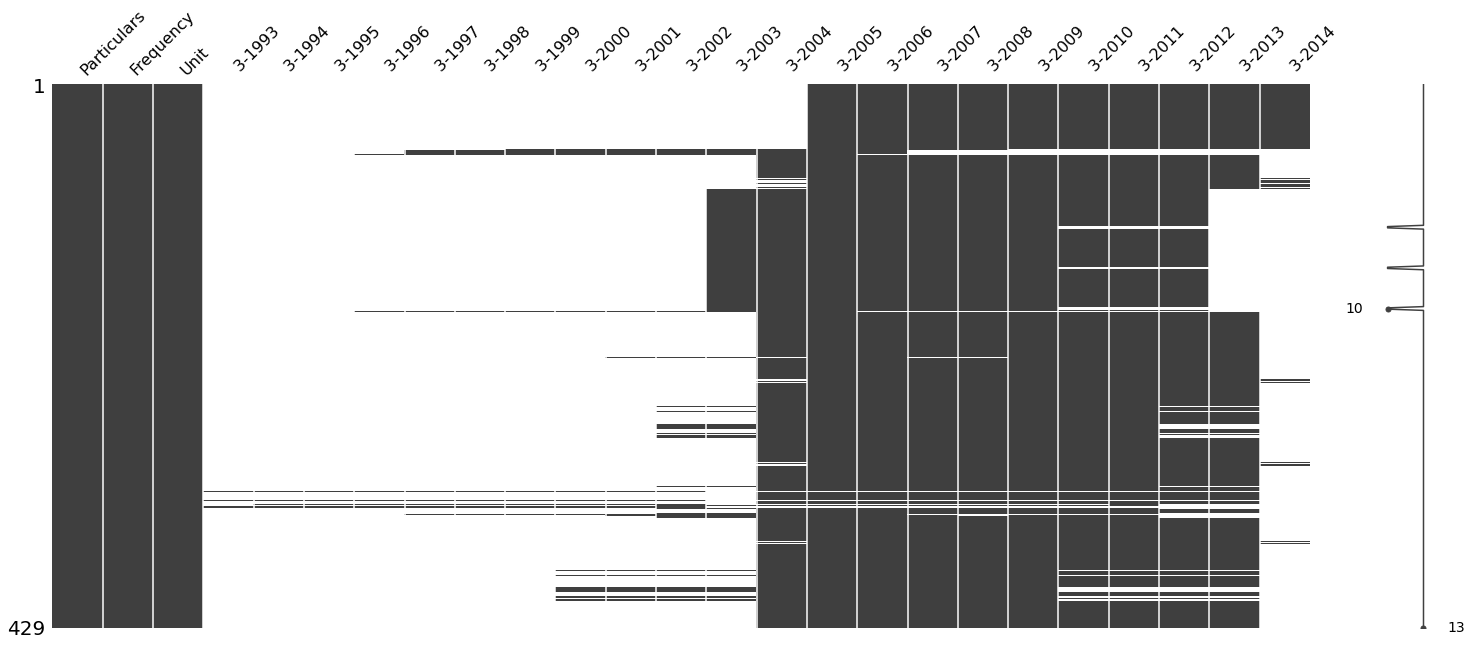

In [35]:
import missingno as msno 
msno.matrix(crop_agri)
#count the number of missing values.
crop_agri.isnull().sum()

In [36]:
print("Particulars",crop_agri.Particulars.value_counts(),sep = '\n')
print("-"*40)
print("Unit",crop_agri.Unit.value_counts(),sep = '\n')
print("-"*40)

Particulars
Agricultural Production Foodgrains                                                               1
Agricultural Production Foodgrains Rice Yield Tamil Nadu                                         1
Agricultural Production Foodgrains Rice Yield Orissa                                             1
Agricultural Production Foodgrains Rice Yield Maharashtra                                        1
Agricultural Production Foodgrains Rice Yield Madhya Pradesh                                     1
                                                                                                ..
Agriculture Production Foodgrains Production Oilseeds Nine Oilseeds Soyabean Kharif              1
Agriculture Production Foodgrains Production Oilseeds Nine Oilseeds Rapeseed and Mustard Rabi    1
Agriculture Production Foodgrains Production Oilseeds Nine Oilseeds Groundnut                    1
Agriculture Production Foodgrains Production Oilseeds Nine Oilseeds                              

In [37]:
crop_agri.isnull().sum().sum()

5166

In [38]:
crop_agri.fillna(0, inplace=True)

In [39]:
import plotly.graph_objects as go
fig = go.Figure()

for i, row in crop_agri.iterrows():
    crop = row['Particulars']
    years = crop_agri.columns[11:]
    production = row[:]

    fig.add_trace(go.Scatter(
        x=years,
        y=production,
        mode='lines+markers',
        name=crop
    ))

fig.update_layout(
    title='Agricultural Production Over Time',
    xaxis_title='Year',
    yaxis_title='Production (Ton mn)'
)

fig.show()